<div class="alert" style="background-color:#abc; color:white; padding:0px 10px; border-radius:3px;"><h3 style='margin:10px 10px; font-size:10px'> This work is licensed under the Creative Commons License <a href="https://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>. This can be shared for educational purposes, with due credits to machinelearningplus.com</h3>
</div>

<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Machine Learning Project Template</h1>
</div>

Just learning the concepts and theory is not sufficient to ace in machine learning. You need to implement the concepts and try to solve more practical problems.

In this notebook, you will learn how to implement machine learning. You will be able to kickstart your project using this template.

### Content:
1. Load the Data
  - Import libraries
  - Load the datasets
  
2. Overview of the Data
  - Descriptive Statistics
  - Missing Values
  
3. Exploratory Data Analysis
  - Create list of columns by data type
  - Check the distribution of target class
  - Check the distribution of every feature
  - Check how differnt numerical features are realated to target class
  
4. Data Preparation
  - Data Cleaning
  - Feature Encoding
  - Split X & y
  - Feature Scaling
  - Train Test split
  
5. Model Building
  - Train Model
  - Model Prediction
  - Model Evaluation
  
7. Improve Model
  - Handle Class Imbalance
  - Hyperparameter Tuning
  - Save the Final Model

## Inputs

The notebook is designed in such a way that you just need to plug in the input values given below and run the code. It will run on it's own and will build the model as well.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries
- Load the dataset

### 1.1. Import Libraries

Import all the libraries in the first cell itself

In [40]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
import tensorflow as tf


### 1.2. Load the datasets

Load the dataset using pd.read_csv()

In [5]:
data = pd.read_csv('/content/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

### 2.1. Descriptive Statistics

As the name says descriptive statistics describes the data. It gives you information about
- Mean, median, mode
- Min, max
- Count etc

Let's understand the data we have

In [6]:
# Dimension of the data
data.shape

(144, 2)

In [7]:
print(data.describe())


       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


### 2.2 Missing Values

Get the info about missing values in the dataframe

In [8]:
print(data.isnull().sum())


Month          0
#Passengers    0
dtype: int64


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Exploratory Data Analaysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Check the distribution of target class
- Check the distribution of every feature
- Check how differnt numerical features are realated to target class

### 3.1. Extract data types of columns

It's better to get the list of columns by data types in the start itself. You won't have to manually write the name of columns while performing certain operations. So always get the list of columns in the start itself.

In [11]:
np.object = object

numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = data.select_dtypes(include=[np.object]).columns.tolist()


**Note :** There might be some mismatch in the data type of the columns, so in such cases you will have to correct it manually

### 3.2 Check distribution of target class

You need to check the distribution of target class, see how many categories are there, is it balanced or not

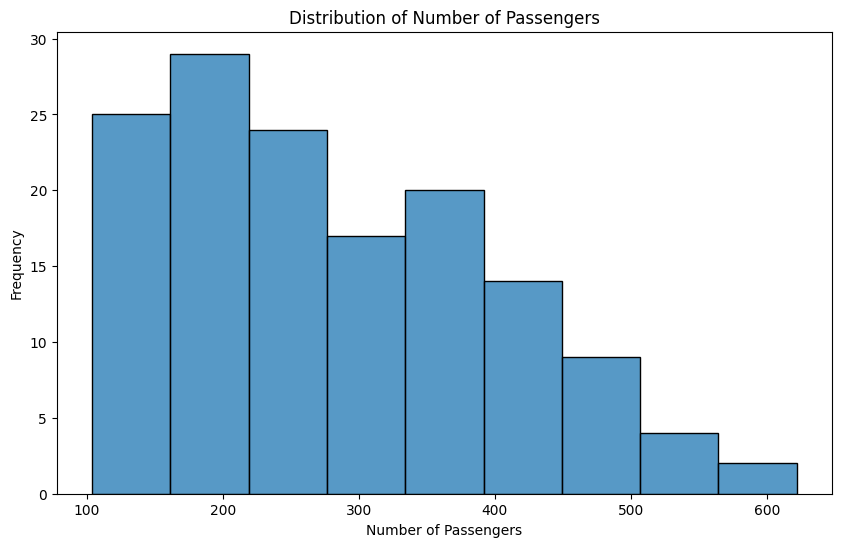

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['#Passengers'])
plt.title('Distribution of Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.show()



### 3.3. Check the distribution of every feature

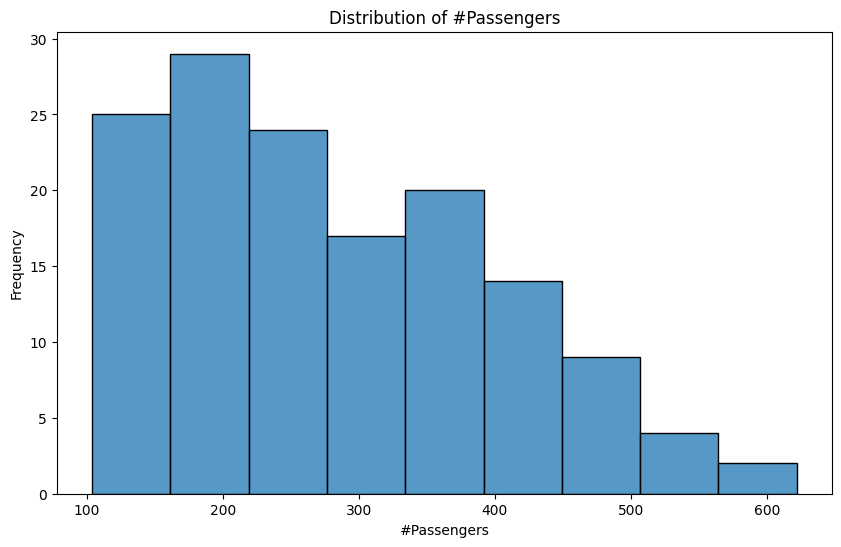

In [22]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


### 3.4 Check how differnt numerical features are realated to target class

In [23]:
for feature in numerical_features:
    if feature != '#Passengers':  # Assuming 'Passengers' is the target column
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data[feature], data['#Passengers'])
        plt.title(f'{feature} vs Passengers')
        plt.xlabel(feature)
        plt.ylabel('Number of Passengers')
        plt.show()



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Preparation</h2>
</div>

The data is not yet ready for model building. You need to process the data and make it ready for model building

In this section you will:
- Clean the data
- Encode the categorical features
- Split the dataset in X and y dataset
- Scale the features
- Split the data in train and test set

### 4.1. Data Cleaning

Machine Learning works on the idea of garbage in - garbage out. If you feed in dirty data, the results won't be good. Hence it's very important to clean the data before training the model.

**Sklearn algorithms need missing value imputation but XGBoost, LightGBM etc does not require missing value imputation**

There are various ways to handle missing values. Some of the ways are:
- Drop the rows with missing values
- Impute the missing values with mean, median, mode, most frequent category, unknown category etc

Here you can decide how you want to handle the missing data

In [24]:
data = data.dropna()


In [25]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 4.2. Feature Encoding

Encoding is the process of converting data from one form to another. Most of the Machine learning algorithms can not handle categorical values unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical columns are encoded.

There are lot of ways in which you can encode the categorical variables. Some of those are:
- Label Encoding
- One Hot Encoding
- Ordinal Encoding
- Frequency Encoding

In [27]:
if 'Month' in data.columns:
    data = pd.get_dummies(data, columns=['Month'], drop_first=True)


### 4.3. Split X and y

Split the X and y dataset

In [29]:
X = data.drop('#Passengers', axis=1)  # Assuming 'Passengers' is the target column
y = data['#Passengers']


### 4.4. Feature Scaling

It is a technique to standardize the x variables (features) present in the data in a fixed range. It needs to be done before training the model.

But if you are using tree based models, you should not go for feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 4.5 Train - Test Split

Split the dataset in training and test set

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

In this section you will:
- Train the model on training data
- Get the predictions on testing data
- Evaluate the performance of model on testing data

### 5.1 Train Model

Train the model on training data

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
4/4 [==============================] - 8s 225ms/step - loss: 96194.2344
Epoch 2/50
4/4 [==============================] - 1s 154ms/step - loss: 96133.0938
Epoch 3/50
4/4 [==============================] - 1s 141ms/step - loss: 96007.7188
Epoch 4/50
4/4 [==============================] - 1s 127ms/step - loss: 95607.1484
Epoch 5/50
4/4 [==============================] - 1s 125ms/step - loss: 94433.5859
Epoch 6/50
4/4 [==============================] - 0s 117ms/step - loss: 93267.0234
Epoch 7/50
4/4 [==============================] - 1s 151ms/step - loss: 92596.3594
Epoch 8/50
4/4 [==============================] - 1s 288ms/step - loss: 92058.1641
Epoch 9/50
4/4 [==============================] - 1s 260ms/step - loss: 91483.1875
Epoch 10/50
4/4 [==============================] - 1s 326ms/step - loss: 90964.8516
Epoch 11/50
4/4 [==============================] - 1s 347ms/step - loss: 90654.5312
Epoch 12/50
4/4 [==============================] - 1s 228ms/step - loss: 90280.1797
E

In [34]:
# Training the model:
model.fit(X_train, y_train)

model

4/4 [==============================] - 1s 136ms/step - loss: 85001.2188


### 5.2 Model Predictions

Get the predictions from the model on testing data

In [35]:
predictions = model.predict(X_test)


1/1 [==============================] - 3s 3s/step


### 5.3. Model Evaluation

Get the evaluation metrics to evaluate the performance of model on testing data

In [36]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 69140.00096687757


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Improve Model</h2>
</div>

The first model you make may not be a good one. You need to improve the model.

In majority of the classification problems, the target class is imbalanced. So you need to balance it in order to get best modelling results.

In this section you will:
- Handle class imbalance
- Save the final model

### 6.3. Save the final model

You can save the model in local disk and use it whenever you want

In [39]:
model.save('final_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<div class="alert" style="background-color:#abc; color:white; padding:0px 10px; border-radius:3px;"><h3 style='margin:10px 10px; font-size:10px'> This work is licensed under the Creative Commons License <a href="https://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>. This can be shared for educational purposes, with due credits to machinelearningplus.com</h3>
</div>